In [1]:
import data_loader
import models
import strategies

data_points = data_loader.load_market_data()

In [2]:
#Test Naive MA
strat = strategies.NaiveMovingAverageStrategy()
signals1 = []
for tick in data_points[:50000]:
    signals1.append(strat.generate_signals(tick))

strat = strategies.OptimizedNaiveMovingAverageStrategy()
signals2 = []
for tick in data_points[:50000]:
    signals2.append(strat.generate_signals(tick))

signals1==signals2

True

In [3]:
signals3 = []
strat = strategies.WindowedMovingAverageStrategy(20)
for tick in data_points[:100000]:
    signals3.append(strat.generate_signals(tick))


In [4]:
def time_Naive(n):
    strat = strategies.NaiveMovingAverageStrategy()
    for tick in data_points[:n]:
        strat.generate_signals(tick)

def time_Optimized(n):
    strat = strategies.OptimizedNaiveMovingAverageStrategy()
    for tick in data_points[:n]:
        strat.generate_signals(tick)

def time_Windowed(n):
    strat = strategies.WindowedMovingAverageStrategy()
    for tick in data_points[:n]:
        strat.generate_signals(tick)

In [5]:
N1000 = %timeit -o time_Naive(1000)
O1000 = %timeit -o time_Optimized(1000)
W1000 = %timeit -o time_Windowed(1000)

6.06 ms ± 923 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.73 ms ± 12 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.14 ms ± 25.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
N10000 = %timeit -o time_Naive(10000)
O10000 = %timeit -o time_Optimized(10000)
W10000 = %timeit -o time_Windowed(10000)

383 ms ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.9 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.3 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
N100000 = %timeit -o time_Naive(100000)
O100000 = %timeit -o time_Optimized(100000)
W100000 = %timeit -o time_Windowed(100000)

37.8 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
176 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
223 ms ± 3.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


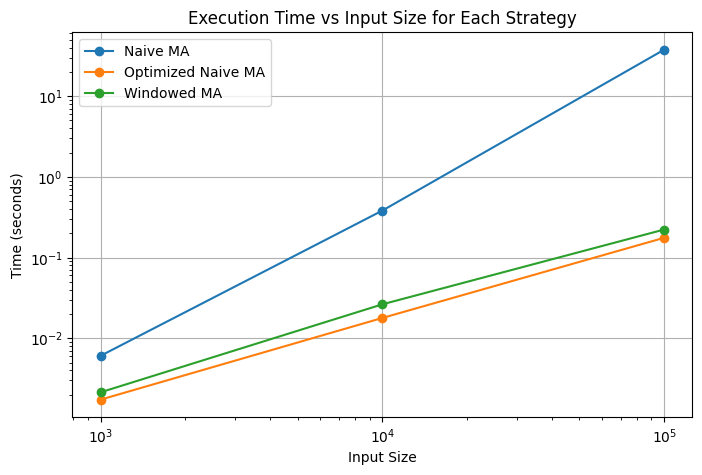

In [8]:
import matplotlib.pyplot as plt

input_sizes = [1000, 10000, 100000]
naive_times = [N1000.average, N10000.average, N100000.average]
optimized_times = [O1000.average, O10000.average, O100000.average]
windowed_times = [W1000.average, W10000.average, W100000.average]
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, naive_times, marker='o', label='Naive MA')
plt.plot(input_sizes, optimized_times, marker='o', label='Optimized Naive MA')
plt.plot(input_sizes, windowed_times, marker='o', label='Windowed MA')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Input Size for Each Strategy')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()